In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-car-price-prediction/ford.csv


# Importacion del CSV

In [2]:
dataframe = pd.read_csv('../input/ford-car-price-prediction/ford.csv')
dt = dataframe

# Vista de los datos


In [3]:
dt.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
dt.shape

(17966, 9)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
dt.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


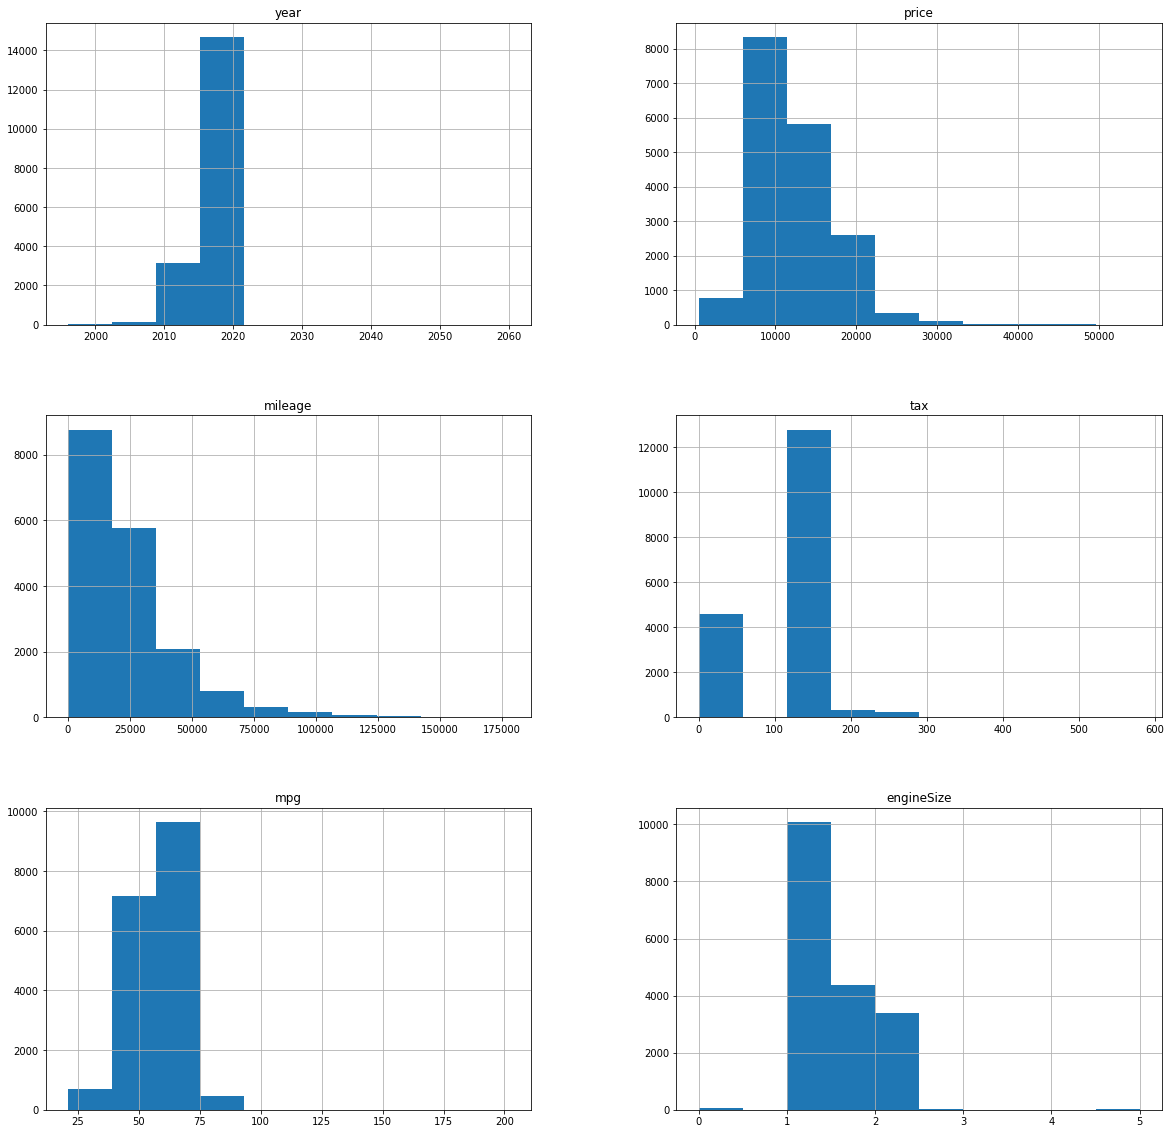

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

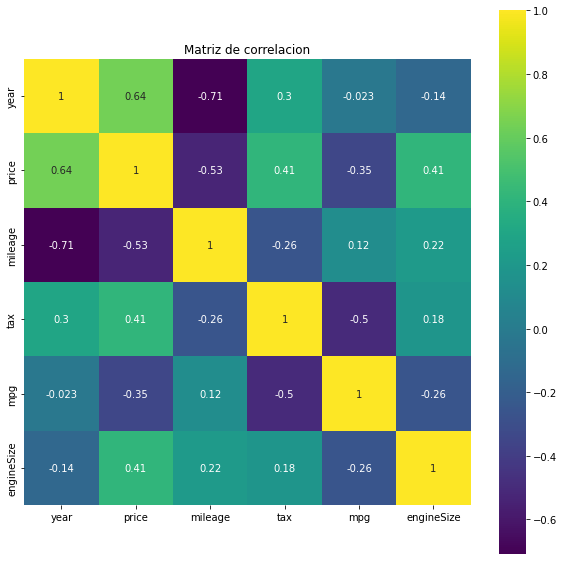

In [8]:
import seaborn as sns
cor = dt.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

In [9]:
dt.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# Data Analytics

In [10]:
Cars = dt['model'].value_counts().head(5)
Cars

 Fiesta      6557
 Focus       4588
 Kuga        2225
 EcoSport    1143
 C-MAX        543
Name: model, dtype: int64

Text(0.5, 1.0, 'Model Cars')

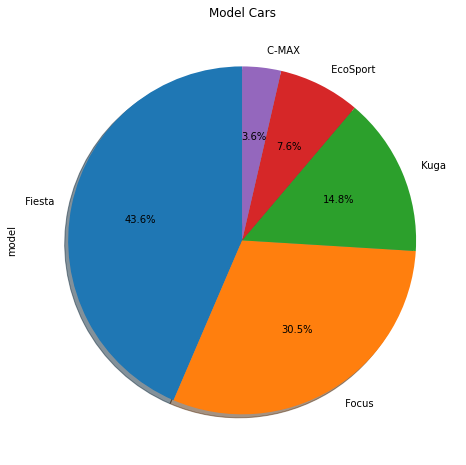

In [11]:
Cars.plot.pie(startangle = 90, shadow = True, autopct = '%1.1f%%',figsize = (8,8))
plt.title('Model Cars')

In [12]:
CarExpensiveNew = dt[(dt['price'] >= 30000) & (dt['mileage'] <= 3000) & (dt['year'] >= 2020)]


In [13]:
count_value=CarExpensiveNew['model'].value_counts().head(5)


Text(0.5, 1.0, 'Car expensive and news')

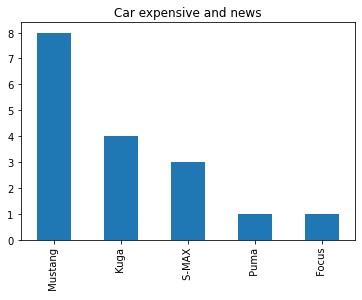

In [14]:
ax = plt.subplots()
count_value.plot.bar()
plt.title('Car expensive and news')

In [15]:
CarCheap = dt[(dt['price'] < 10000)]


In [16]:
count_value2=CarCheap['model'].value_counts().head(5)

Text(0.5, 1.0, 'Cars cheap')

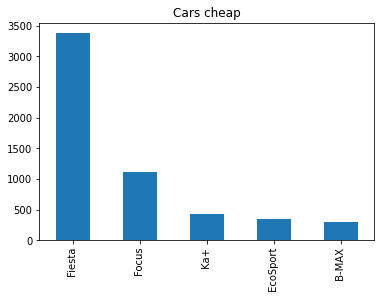

In [17]:
ax = plt.subplots()
count_value2.plot.bar()
plt.title('Cars cheap')

<AxesSubplot:xlabel='year', ylabel='Count'>

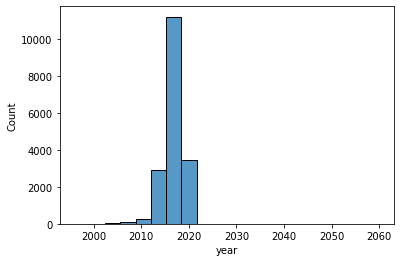

In [18]:
sns.histplot(data=dt, x=dt['year'], bins = 20)

# Preprocesamiento

In [19]:
dt.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [20]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
dt['model'] = encoder.fit_transform(dt['model'])
dt['transmission'] = encoder.fit_transform(dt['transmission'])
dt['fuelType'] = encoder.fit_transform(dt['fuelType'])

In [21]:
array = dt.values
X = array[:, 0:8]
Y = array[:, 8]

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescalerX = scaler.fit_transform(X)

estandar = StandardScaler().fit(rescalerX)
estandarX = estandar.transform(rescalerX)

X_reg = estandarX

# Modelado

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


models = []
models.append(('ElN', ElasticNet()))
models.append(('LS', Lasso()))
models.append(('LR', LinearRegression()))
models.append(('RiG', Ridge()))
models.append(('KR', KNeighborsRegressor()))
models.append(('SVR',  SVR()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    result =  cross_val_score(model, X_reg, Y,  cv=kfold)
    results.append(result)
    names.append(name)
    print(f"{name}: {result.mean()*100.0:,.2f} ({result.std()*100.0:,.2f})")

ElN: -0.85 (0.89)
LS: -0.85 (0.89)
LR: 70.51 (7.64)
RiG: 70.51 (7.64)
KR: 93.79 (5.53)
SVR: 91.78 (5.30)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, Y, test_size=0.40 )
svc = KNeighborsRegressor(n_neighbors=7, weights="distance", algorithm="ball_tree")
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
score =r2_score(y_test, predicted)
print(f"Score: {score}")

Score: 0.9281024191795566
